In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set(color_codes=True)

# Turnover Analysis
__Unit 1 Capstone
<br>by Jessica Ngo
<br>April 2018__

In [2]:
#import dataframe
df=pd.read_csv("data/turnover.csv")

In [3]:
len(df)

14999

The Society of Human Resources Management (SHRM, 2017) states that mornitoring turnover is an important function of human resources. Analyzing turnover will allow companies to closely monitor how and why employees are leaving the organization. Using the results of such analysis will allow HR departments to mitigate turnover and retain their best employees.

## Turnover Data Exploration

The data was downloaded from [Kaggle](https://www.kaggle.com/lnvardanyan/hr-analytics/data). There are 14999 records and each record represents an employee and each column represents that employee's attributes. These attributes include:
<br>
>satisfaction_level: the employee's satisfaction level at the company (range from 0 to 1)
<br>last_evaluation: time since the employee's last evaluation at the company, in years
<br>number_projects: numbers of projects that employee has completed during their tenure at the company
<br>average_monthly_hours: average monthly hours employee worked at the company
<br>time_spend_company: time employee spent at company, in years
<br>Work_accident: whether the employee had a workplace accident (1 if true, 0 if false)
<br>left: whether the employee left the company (1 if true, 0 if false)
<br>promotion_last_5years: whether the employee was promotoed in the last five years (1 if true, 0 if false)
<br>sales: department the employee worked for
<br>salary: relative level of salary (low, medium, high)

"Left" will be our key metric. 

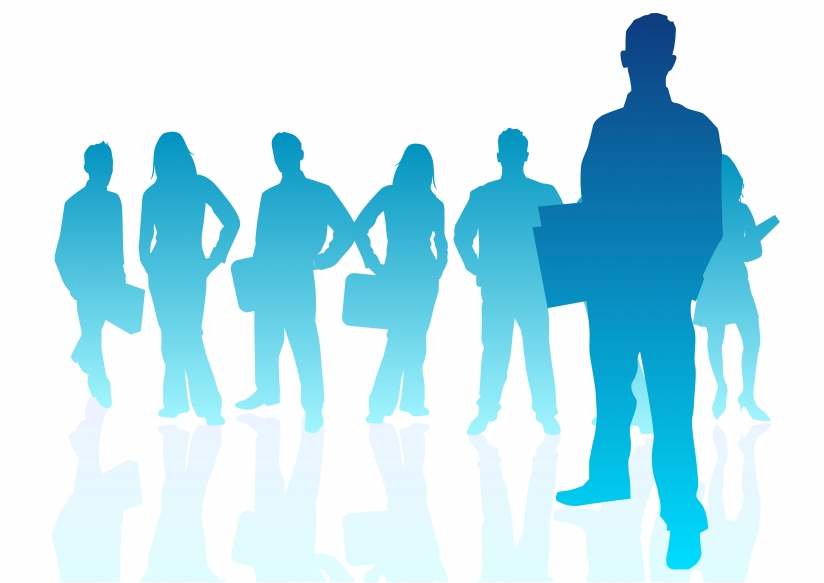

In [4]:
from IPython.display import Image
Image(filename='data/employees.jpg')

[Image Source](http://bergcpa.com/when-to-know-its-time-to-hire-your-first-employee/)

In [5]:
#number of those who have left the company
(df['left'] == 1).sum()

3571

In [6]:
#percentage of those who have left the company and those who have stayed with the company
df['left'].value_counts()/len(df)*100

0    76.191746
1    23.808254
Name: left, dtype: float64

In [7]:
#view columns
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
#change column names
df.rename(columns={'sales':'department'}, inplace = True) 

In [9]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
#view first five lines
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
#check for any empty values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [12]:
#view summary stats of qualitative variables
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
#see if there are any differences between those who left and those who did not across quanitative attributes
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From this we can see that:

The following attributes are <b>lower</b>, on average, for those who left than those who stayed:
<br>
>satisfaction level
<br>work accident
<br>promotion in last 5 years

The following attributes are <b>higher</b>, on averaage, for those who left than those who stayed:
<br>
>last evaluation
<br>number of projects
<br>average monthly hours
<br>time spent at company

In [14]:
#see if there are any differences for other qualitative attributes (department, and then salary)
df.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [15]:
#see if there are any differences for other qualitative attributes (department, and then salary)
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


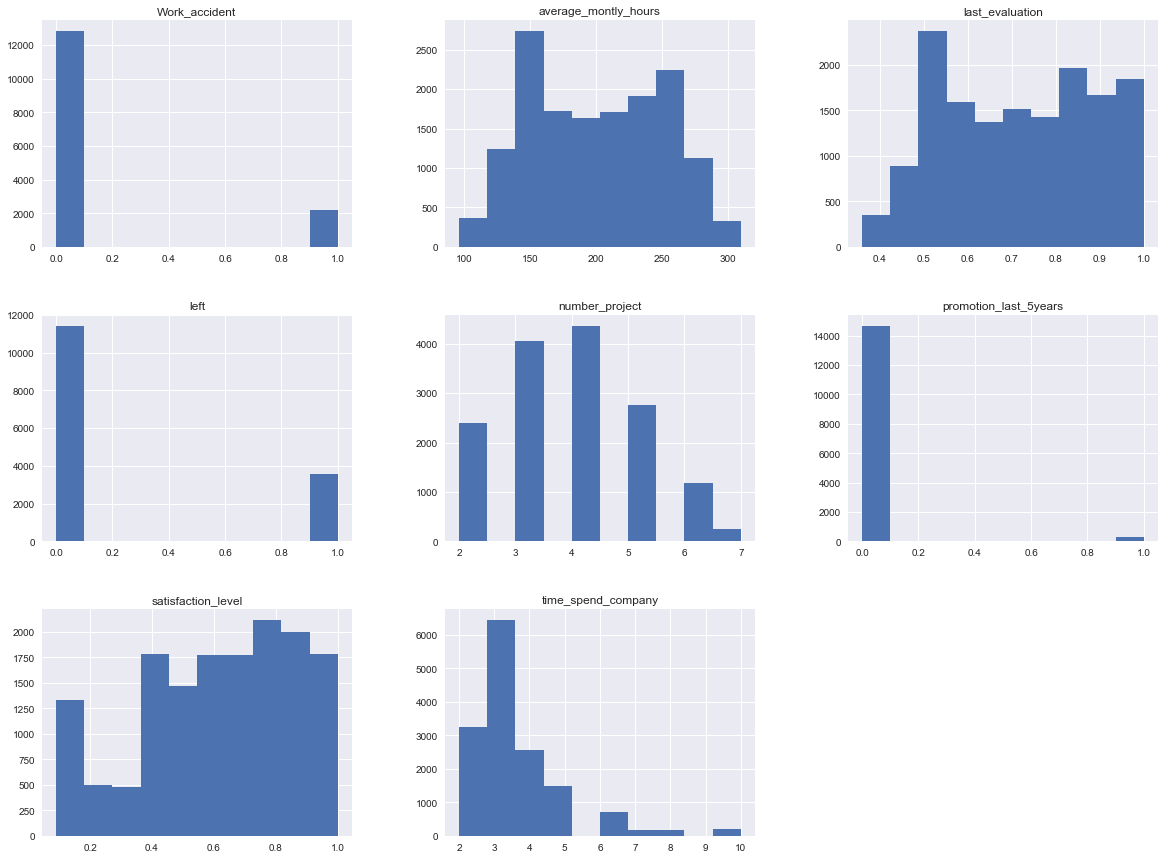

In [16]:
#histogram of numeric variables
df.hist(bins=10, figsize=(20,15))
plt.show()

In [17]:
#Correlation Matrix
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


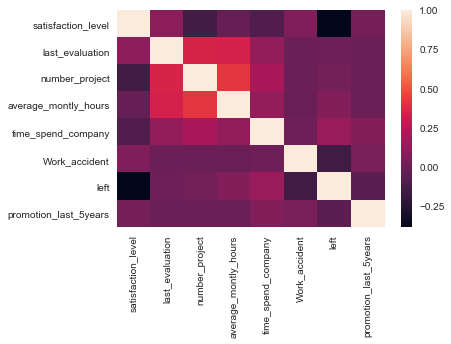

In [18]:
#Correlation Heatmap
sns.heatmap(df.corr())
plt.show()

From our correlation matrix and heatmap, we find moderate positive correlations for the following relationships:
<br>
>number of projects and last evaluation (.34933)
<br>number of projects and average monthly hours (.417211)
<br>average monthly hours and last evaluation (.3397)

We find moderately negative correlations for satisfaction and turnover (.3884). This is an attribute that is correlated with our key metric.

Due to the aforementioned correlation, I will run a t-test to determine whether the average satisfaction level of employees who left is significantly different from those who are still with the company.

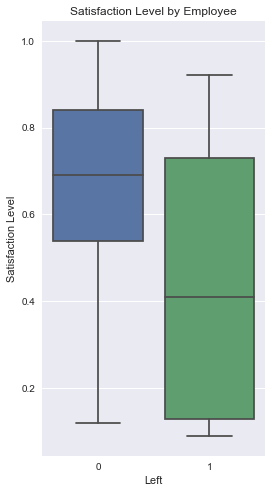

In [19]:
#boxplot of satisfaction level by left
plt.figure(figsize=(4, 8))
sns.boxplot(x=df['left'], y=df['satisfaction_level'])
plt.xlabel('Left')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level by Employee')
plt.show()
#test difference using t-statistic

In [20]:
stats.ttest_ind(df['left'], df['satisfaction_level'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-93.06077566920372, pvalue=0.0)

We see that there is indeed a significant difference in average satisfaction level between those who have left the company and those who are still with the company.

## Research Proposal
From our data exploration, we see that satisfcation level are correlated with whether an employee leaves the company. With these results, I will measure attributes I expect are correlated with employee satisfaction levels, and then run AB tests on these attributes.